### Explore the Telco dataset 
- [x] Pull in data
- [x] Prep data (including splitting it)
- [X] Form more specific questions to ask of the data
- [ ] Explore univariate data
- [ ] Explore bivariate data (to answer questions)
- [ ] Explore multivariate data (optional)

In [2]:
# import libraries
import acquire
import prepare
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats

warnings.simplefilter(action='ignore')

In [3]:
acquire.print_libs()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [4]:
df = acquire.get_telco_data()

Reading from file...


In [5]:
acquire.df_info(df)

,nunique,dtypes,isnull,4723
payment_type_id,4,int64,0,2
internet_service_type_id,3,int64,0,3
contract_type_id,3,int64,0,3
customer_id,7043,object,0,6651-RLGGM
gender,2,object,0,Male
senior_citizen,2,int64,0,0
partner,2,object,0,Yes
dependents,2,object,0,Yes
tenure,73,int64,0,67
phone_service,2,object,0,Yes


In [6]:
df = prepare.prep_telco(df)

In [7]:
acquire.df_info(df,samples=1)

,nunique,dtypes,isnull,7164-BPTUT
gender,2,object,0,Male
senior_citizen,2,object,0,No
married,2,object,0,No
children,2,object,0,Yes
tenure_months,73,int64,0,57
paperless_billing,2,object,0,No
monthly_charges,1585,float64,0,89.55
total_charges,6531,float64,0,5012.35
churn,2,object,0,No
contract_type,3,object,0,Two year


In [8]:
tvt_set = train,validate,test = prepare.split_df(df,'churn')

In [9]:
# Verify the dataframe split correctly
for df in tvt_set:
    print(df.shape)

(4225, 16)
(1409, 16)
(1409, 16)


> Let's start asking some questions.
- Does internet (or lack of) affect churn? If so, do any of the internet services have an impact on churn?
- What is the relationship between monthly charges and churn?
- What contract types cause higher churn?
- (OPT) How do the services affect monthly charges?
- (OPT) Is there any correlation between family life(being married/having kids) and churn?
- (OPT) Does tenure have an impact on churn? (think count of churn against tenure for linear progression)

In [11]:
# View train
acquire.df_info(train)

,nunique,dtypes,isnull,9625-QNLUX
gender,2,object,0,Male
senior_citizen,2,object,0,No
married,2,object,0,Yes
children,2,object,0,Yes
tenure_months,73,int64,0,68
paperless_billing,2,object,0,Yes
monthly_charges,1374,float64,0,103.25
total_charges,4006,float64,0,7074.4
churn,2,object,0,No
contract_type,3,object,0,Two year


In [12]:
# play with checking out dropping columns
acquire.df_info(prepare.drop_extras(train,9))

,nunique,dtypes,isnull,4800-CZMPC
children,2,object,0,Yes
tenure_months,73,int64,0,48
paperless_billing,2,object,0,Yes
monthly_charges,1374,float64,0,103.25
total_charges,4006,float64,0,5037.55
churn,2,object,0,Yes
contract_type,3,object,0,One year
internet_service_type,3,object,0,Fiber optic
payment_type,4,object,0,Credit card (automatic)
streaming,5,object,0,Both


In [13]:
# get obj_cols
obj_col = []

for col in train.columns:
    # print(col)
    if train[col].dtype == 'O':
        # print('object')
        obj_col.append(col)

obj_col

['gender',
 'senior_citizen',
 'married',
 'children',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'streaming',
 'phone_lines',
 'protection',
 'support']

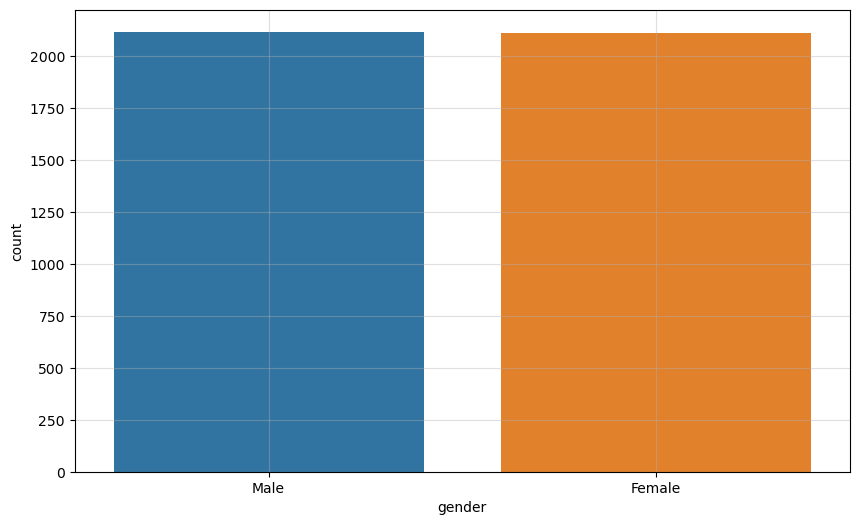

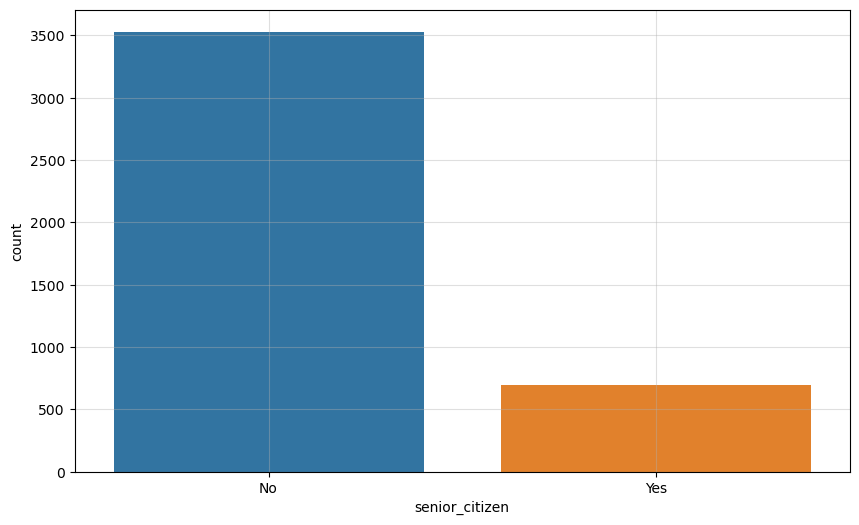

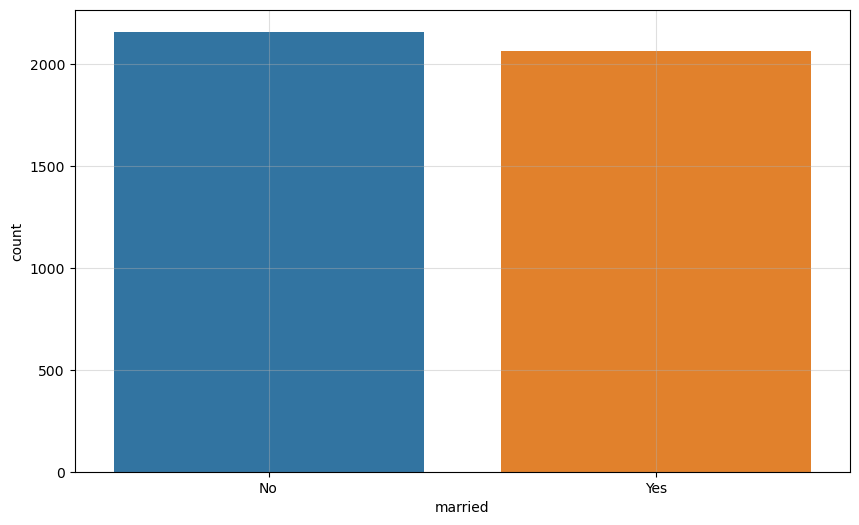

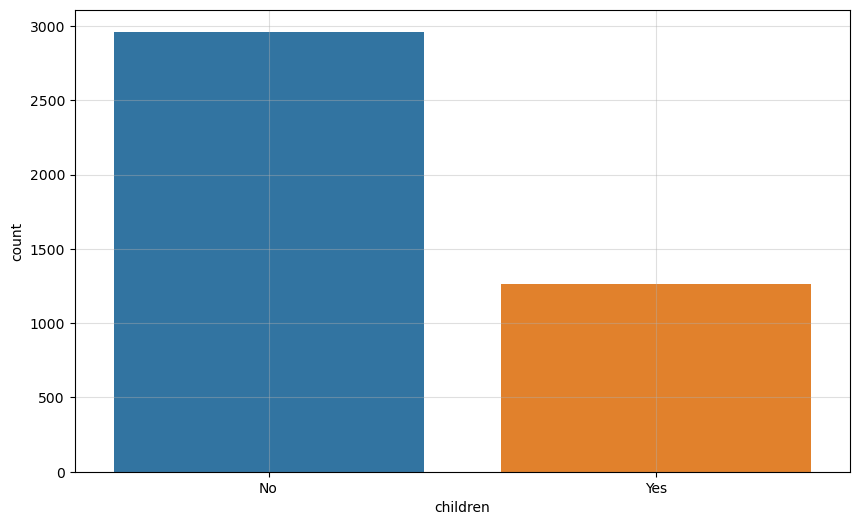

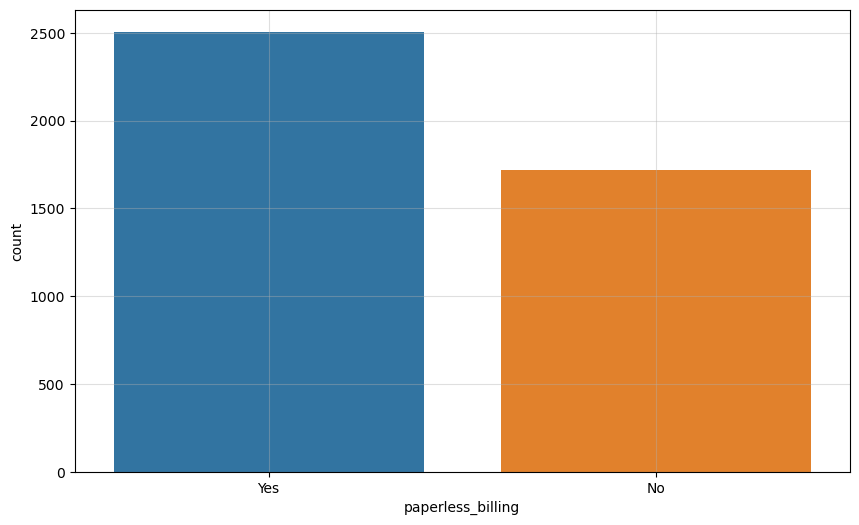

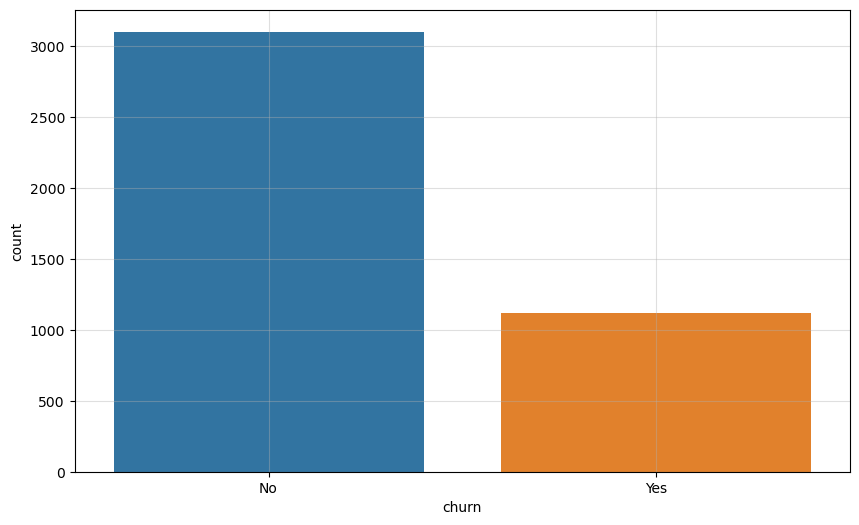

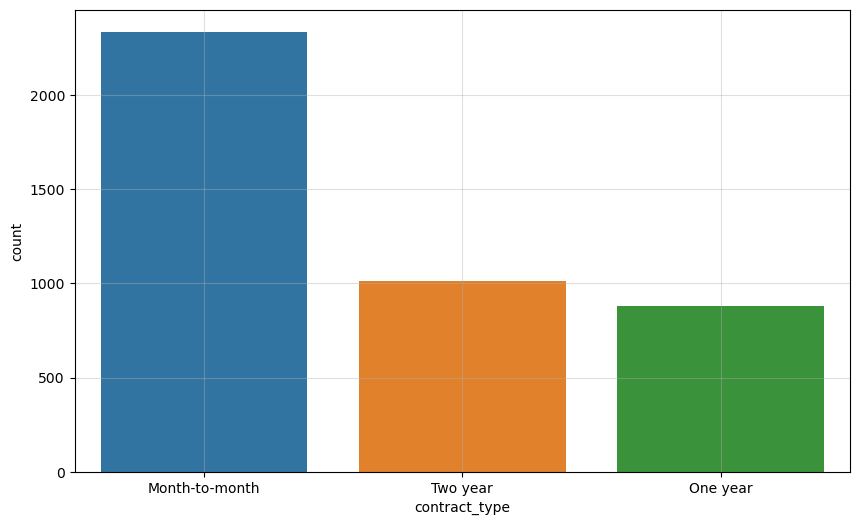

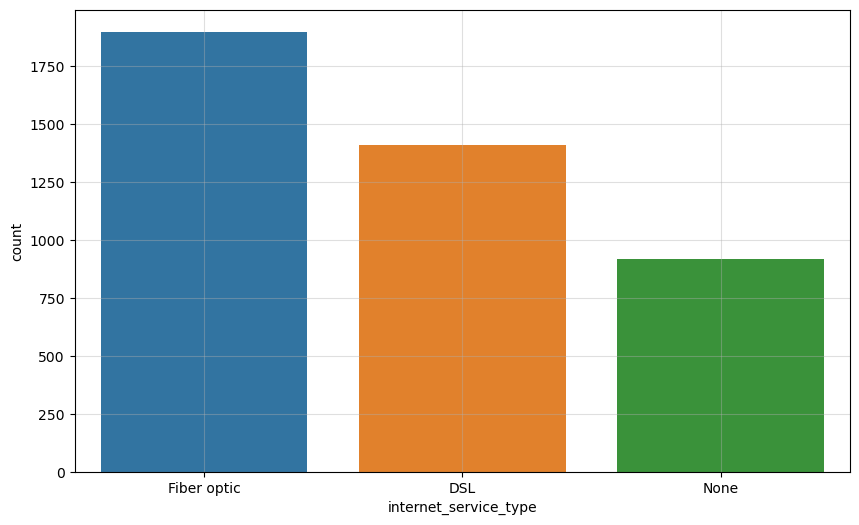

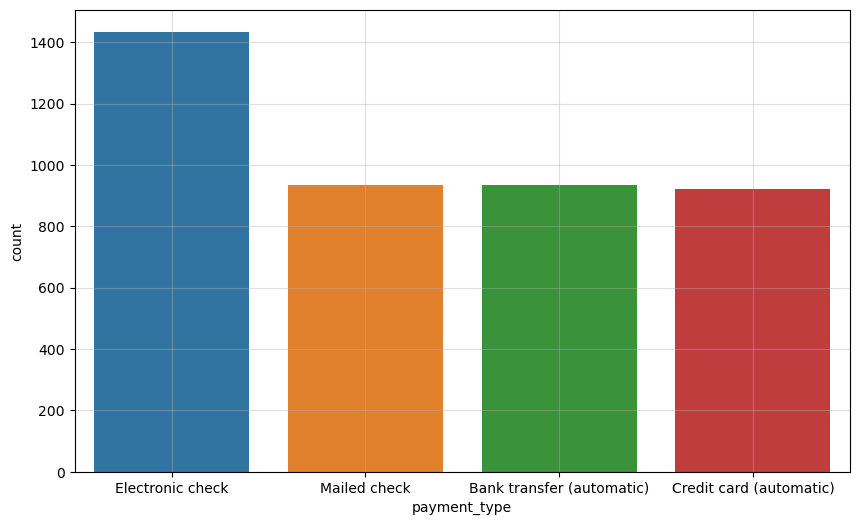

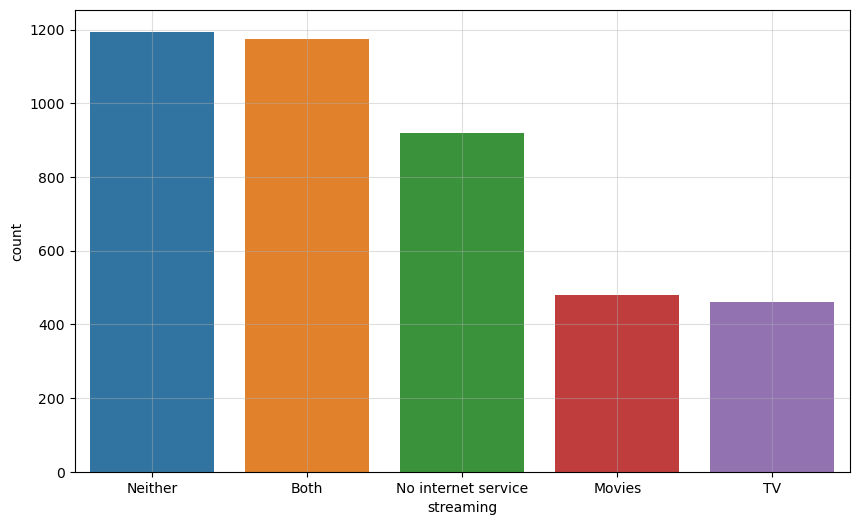

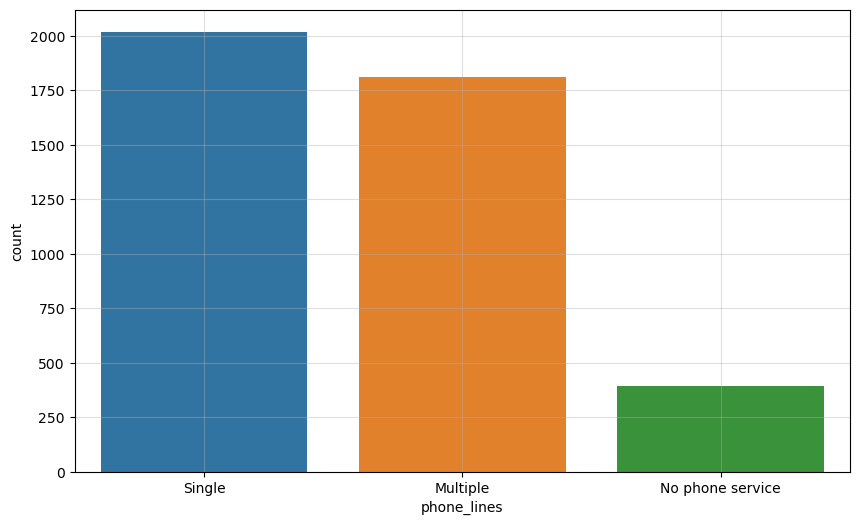

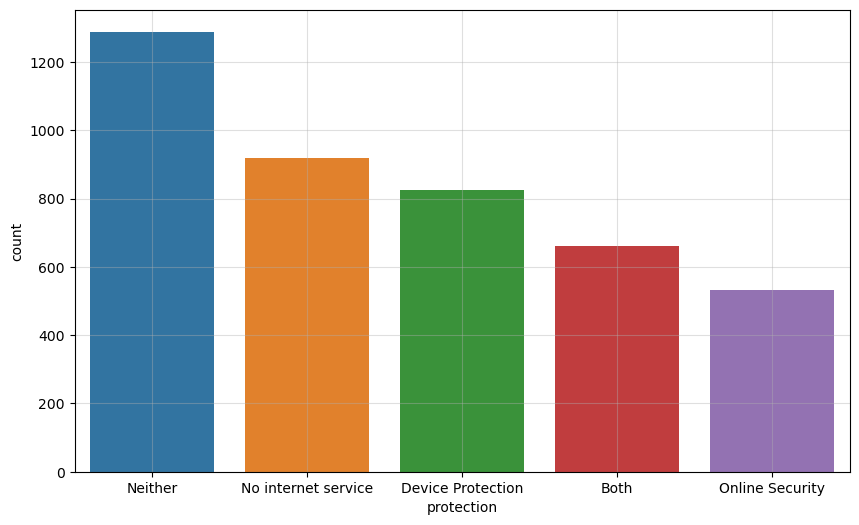

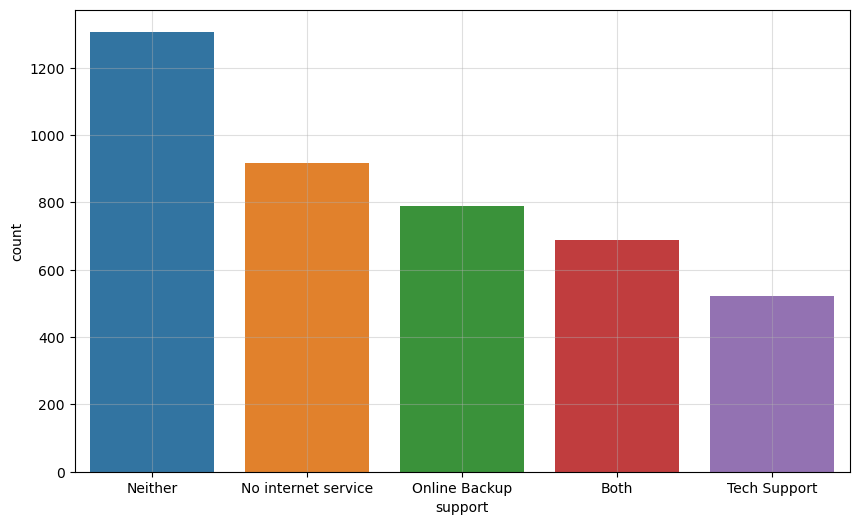

In [14]:
# Explore categorical items
for col in obj_col:
    plt.figure(figsize=(10,6))
    sns.countplot(data=train,x=col,order=train[col].value_counts().index)

    plt.grid(alpha=0.4)
    plt.show()

- Gender: Equal, probably plays a very small role
- Senior Citizen: Many more no's, so this may play not as large of a role
- Married: Mostly equal, but looks like slightly more no's than yes's
- Children: Many more no's. 
    - *What if having children causes higher churn?*
- Paperless Billling: Most customers prefer paperless billing
- Contract Type: Most are month-to-month, followed by 2 year contracts. Seems like customers may prefer flexible contract types or are completely dedicated. 
    - **Perhaps explore contract type against senior citizen, married, and children?**
- Internet Service Type: Most prefer fiber, followed by DSL.
- Payment Type: E-check is the most popular, and the others are mostly equal
- Streaming: Most don't have streaming, but if they do then it's mostly both
- Phone Lines: Most common is a single line
    - *Does this match up against being married?*
- Protection: Most have neither service or have no internet service, so this might not be as important to customers
- Support: Most have neither service or have no internet service, so this might not be as important to customers

In [16]:
# Look at the continuous data
acquire.df_info(train)

,nunique,dtypes,isnull,0927-LCSMG
gender,2,object,0,Male
senior_citizen,2,object,0,No
married,2,object,0,No
children,2,object,0,No
tenure_months,73,int64,0,7
paperless_billing,2,object,0,No
monthly_charges,1374,float64,0,74.65
total_charges,4006,float64,0,544.55
churn,2,object,0,Yes
contract_type,3,object,0,Month-to-month


In [17]:
# isolate the continuous columns
con_col = [col for col in train.columns if train[col].dtype != 'O']
# for col in train.columns:
#     if train[col].dtype != 'O':
#         print(train[col].dtype)

con_col

['tenure_months', 'monthly_charges', 'total_charges']

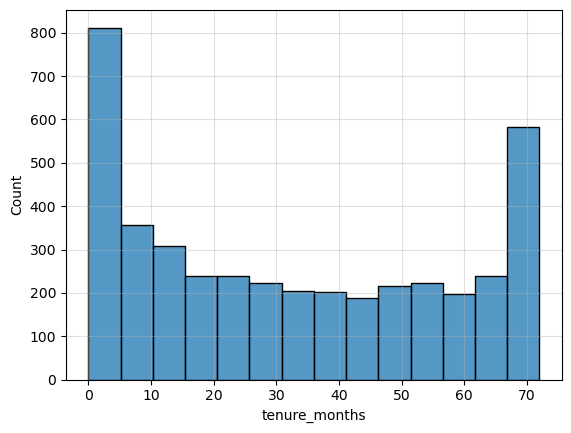

In [18]:
# test plot 1 continuous
sns.histplot(data=train,x=con_col[0])

plt.grid(alpha=0.4)

plt.show()

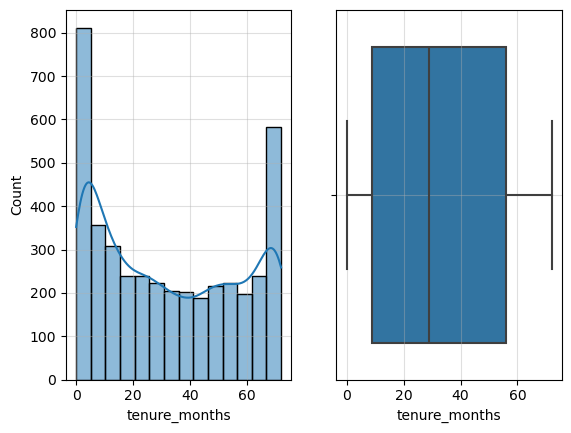

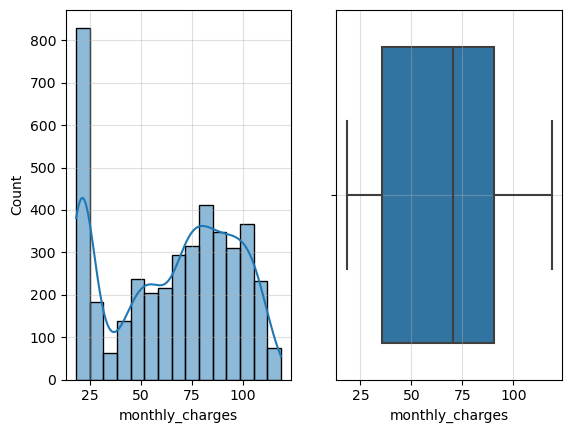

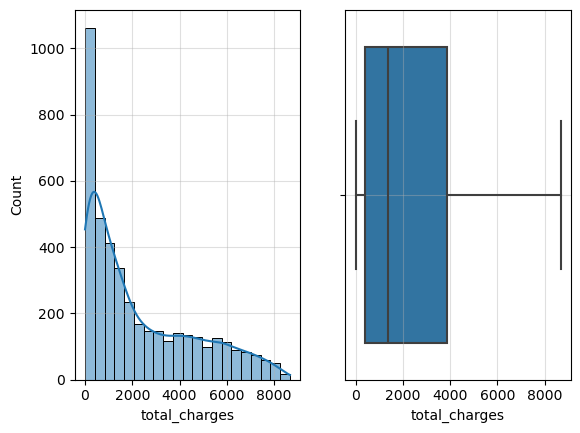

In [19]:
for col in con_col:
    
    plt.subplot(121)
    sns.histplot(data=train,x=col,kde=True)
    plt.grid(alpha=0.4)
    
    plt.subplot(122)
    sns.boxplot(data=train,x=col)
    plt.grid(alpha=0.4)
    
    plt.show()

- Tenure: It looks like there are a lot of customers who are either at a very short tenure or very long tenure.
    - As time increases customers fall off? Maybe at a certain point customers are dead-set on being with the company?
    - **How is the contrast between tenure and monthly charges?**
- Monthly Charges: Bulk of monthly charges falls between ~$40-90
    - **How does monthly charges affect churn?**
- Total Charges: As total charges increases, there's less and less, which is something we might expect to see as time goes on and customers leave the company. We can probably drop this column.

> At this point let's explore the bivariate stats.

Our primary questions:
> - Does internet (or lack of) affect churn? If so, do any of the internet services have an impact on churn?
> - What is the relationship between monthly charges and churn?
> - What contract types cause higher churn?

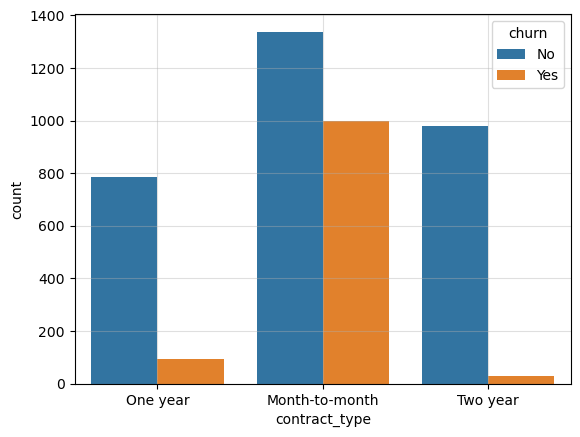

In [22]:
# let's look at the first one
sns.countplot(data=train,x='contract_type',hue='churn')

plt.grid(alpha=0.4)

plt.show()

Just based off this we can see there is a good relationship between churn and month-to-month contracts, but the month-to-month also makes up the largest portion of non-churned customers. **It would be good to match the month-to-month contracts against tenure.**

In [24]:
# let's run a stats test to verify
# These are both categorical, so it'll be proportions (chi^2)
alpha = 0.05

observed = pd.crosstab(train.churn,train.contract_type)

t,p,dof,expected = stats.chi2_contingency(observed)

print("H_0: Churn and contract type are independent of each other")
print("H_a: Churn and contract type are not independent of each other")

if p < alpha:
    print('Reject null hypothesis')
    print(f'p-value: {p}')
    print(f'test stat: {t}')
    print('Churn and contract type are not independent of each other.')
else:
    print('Fail to reject the null hypothesis')
    print(f'p-value: {p}')
    print(f'test stat: {t}')
    print('Churn and contract type are independent of each other.')

H_0: Churn and contract type are independent of each other
H_a: Churn and contract type are not independent of each other
Reject null hypothesis
p-value: 8.298049251133243e-156
test stat: 714.1745080997528
Churn and contract type are not independent of each other.


From this test, we conclude that there may be a **very** strong relationship between contract type and churn.

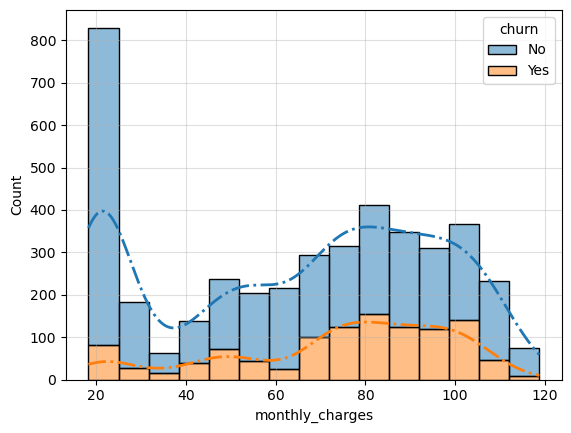

In [367]:
# Look at monthly charges and churn
# This will be a t-test.
# First check normal distribution using graphs:
sns.histplot(data=train,x='monthly_charges',hue='churn',kde=True,multiple='stack',alpha=0.5,line_kws={'lw':2,'ls':'-.'})

plt.grid(alpha=0.4)

plt.show()

It looks like churn increases to a maximum rate around the $80-100 mark

In [28]:
# H_0: The data is drawn from a normal distribution
# H_a: The data is not drawn from a normal distribution

stats.shapiro(train.monthly_charges)

ShapiroResult(statistic=0.9185670018196106, pvalue=5.647232811229013e-43)

P is definitely smaller than 0.05, so the alternate hypothesis is true and it is not drawn normally. Comparing 2 subgroups, so it's **Mann-Whitney**

In [30]:
# H_0: There is no difference between the monthly charges of customers who have churned and those who have not.
# H_a: There is a difference between the monthly charges of customers who have churned and those who have not.

alpha = 0.05
stats, p = stats.mannwhitneyu(
    train[train.churn == 'Yes'].monthly_charges,
    train[train.churn == 'No'].monthly_charges
)

if p < alpha:
    print('Reject the null hypothesis')
    print(f'p-value: {p}')
    print('There is a difference between the monthly charges of customers who have churned and those who have not.')
else:
    print('Fail to reject the null hypothesis')
    print(f'p-value: {p}')
    print('There is no difference between the monthly charges of customers who have churned and those who have not.')

Reject the null hypothesis
p-value: 9.83259830397179e-30
There is a difference between the monthly charges of customers who have churned and those who have not.


In [31]:
# let's look back at our columns
acquire.df_info(train)

,nunique,dtypes,isnull,3967-KXAPS
gender,2,object,0,Male
senior_citizen,2,object,0,No
married,2,object,0,Yes
children,2,object,0,No
tenure_months,73,int64,0,72
paperless_billing,2,object,0,No
monthly_charges,1374,float64,0,92.3
total_charges,4006,float64,0,6719.9
churn,2,object,0,No
contract_type,3,object,0,Two year


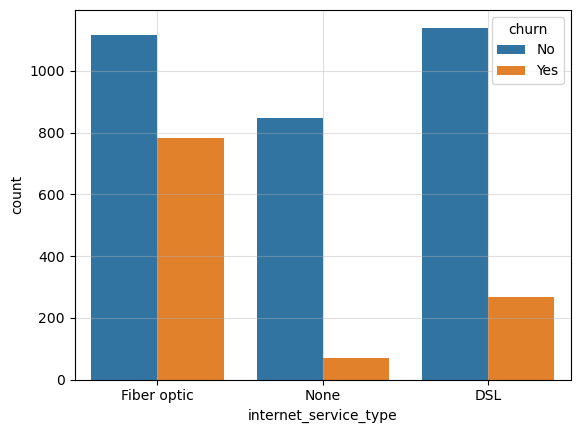

In [32]:
# Finally let's look at churn against internet service
sns.countplot(data=train,x='internet_service_type',hue='churn')

plt.grid(alpha=0.4)

plt.show()

Based on this, it would appear that customers churn mostly from fiber optic, while most are happy with DSL.

**We could cross-examine fiber optic against monthly charges**

In [62]:
from scipy import stats

In [70]:
# Run stats test
observed = pd.crosstab(train.churn,train.internet_service_type)

t,p,dof,expected = stats.chi2_contingency(observed)
alpha = 0.05
print('H_0: Churn and internet service type are independent of one another')
print('H_a: Churn and internet service type are not independent of one another')

if p < alpha:
    print('Reject the null hypothesis')
    print(f'p-value: {p}')
    print(f'Significance: {t}')
    print('Churn and internet service type are not independent of one another')
else:
    print('Fail to reject the null hypothesis')
    print(f'p-value: {p}')
    print(f'Significance: {t}')
    print('Churn and internet service type are independent of one another')

H_0: Churn and internet service type are independent of one another
H_a: Churn and internet service type are not independent of one another
Reject the null hypothesis
p-value: 1.8061078882405112e-91
Significance: 417.88813854093104
Churn and internet service type are not independent of one another


In [74]:
# Add function to test hypothesis (saves on typing)
with open('prepare.py','a') as file:
    file.write("""
# Function to return whether answer on rejecting or failing to reject null hypothesis
def test_hypothesis(p, 
                    stat, 
                    tails='two', 
                    direction='greater',
                    alpha=0.05):
    '''
    test_hypothesis will take in a p value and a test statistic
    if p is less than a presumed alpha, then we  will reject
    our null hypothesis
    
    this takes in two positional arguments,
    p stat, a float value representing the probability of serendipity
    stat, a float value representing the test statistic
    
    with the keyword arguments f tails, direction, and alpha,
    the operator is able to change the control structrure in order
    to perform a one-tailed ttest if so desired
    '''
    if tails == 'two':
        if p < alpha:
            print(f'We reject the null hypothesis.\\n Our p-value is {p} \\n Our statistic value is {stat}')
        else:
            print(f'We fail to reject the null hypothesis.\\n Our p-value is {p}.\\n Our statistic is {stat}')
    else:
        if direction == 'greater':
            if ((p/2) < alpha) and (stat > 0):
                print(f'We reject our null hypothesis.\\n Our p-value is {p} \\n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis.\\n Our p-value is {p}.\\n Our statistic is {stat}')
        else:
            if ((p/2) < alpha) and (stat < 0):
                print(f'We reject our null hypothesis.\\n Our p-value is {p} \\n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis.\\n Our p-value is {p}.\\n Our statistic is {stat}')
    """)

In [87]:
# Function to return whether answer on rejecting or failing to reject null hypothesis
def test_hypothesis(p, 
                    stat, 
                    tails='two', 
                    direction='greater',
                    alpha=0.05):
    '''
    test_hypothesis will take in a p value and a test statistic
    if p is less than a presumed alpha, then we  will reject
    our null hypothesis
    
    this takes in two positional arguments,
    p stat, a float value representing the probability of serendipity
    stat, a float value representing the test statistic
    
    with the keyword arguments f tails, direction, and alpha,
    the operator is able to change the control structrure in order
    to perform a one-tailed ttest if so desired
    '''
    if tails == 'two':
        if p < alpha:
            print(f'We reject the null hypothesis.\n Our p-value is {p} \n Our statistic value is {stat}')
        else:
            print(f'We fail to reject the null hypothesis.\n Our p-value is {p}.\n Our statistic is {stat}')
    else:
        if direction == 'greater':
            if ((p/2) < alpha) and (stat > 0):
                print(f'We reject our null hypothesis.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis.\n Our p-value is {p}.\n Our statistic is {stat}')
        else:
            if ((p/2) < alpha) and (stat < 0):
                print(f'We reject our null hypothesis.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis.\n Our p-value is {p}.\n Our statistic is {stat}')

In [90]:
# let's look more at internet service types and group no internet to having internet
train.internet_service_type.value_counts()

internet_service_type
Fiber optic    1898
DSL            1409
None            918
Name: count, dtype: int64

In [114]:
no_internet = train.internet_service_type == 'None'
no_internet

customer_id
4083-BFNYK    False
5804-LEPIM    False
4895-TMWIR     True
1342-JPNKI    False
3397-AVTKU    False
              ...  
1915-IOFGU    False
7025-WCBNE    False
9788-HNGUT    False
5229-PRWKT    False
7562-UXTPG    False
Name: internet_service_type, Length: 4225, dtype: bool

In [121]:
# crosstab having internet or not to churn
internet = train.internet_service_type != 'None'
observed = pd.crosstab(internet,train.churn)
observed

churn,No,Yes
internet_service_type,,
False,848,70
True,2256,1051


In [129]:
# H_0: Having internet or not is independent of churn
# H_a: Having internet or not is not independent of churn

t,p,dof,expected = stats.chi2_contingency(observed)

In [133]:
test_hypothesis(p,t)

We reject the null hypothesis.
 Our p-value is 1.9838411045748552e-48 
 Our statistic value is 213.85198688891234


In [145]:
pd.crosstab(internet,train.churn,margins=True,normalize='all')

churn,No,Yes,All
internet_service_type,,,
False,0.200710,0.016568,0.217278
True,0.533964,0.248757,0.782722
All,0.734675,0.265325,1.000000


So having internet can affect churn. It looks like almost half of customers with internet churn, while only a small fraction of those without internet churn.

Of those who haven't churned, almost half of them don't have internet, while of those who did churn, only a small fraction don't have internet.

We can conclude that having internet can influence a customer churning, and it's usually related to fiber optic internet.

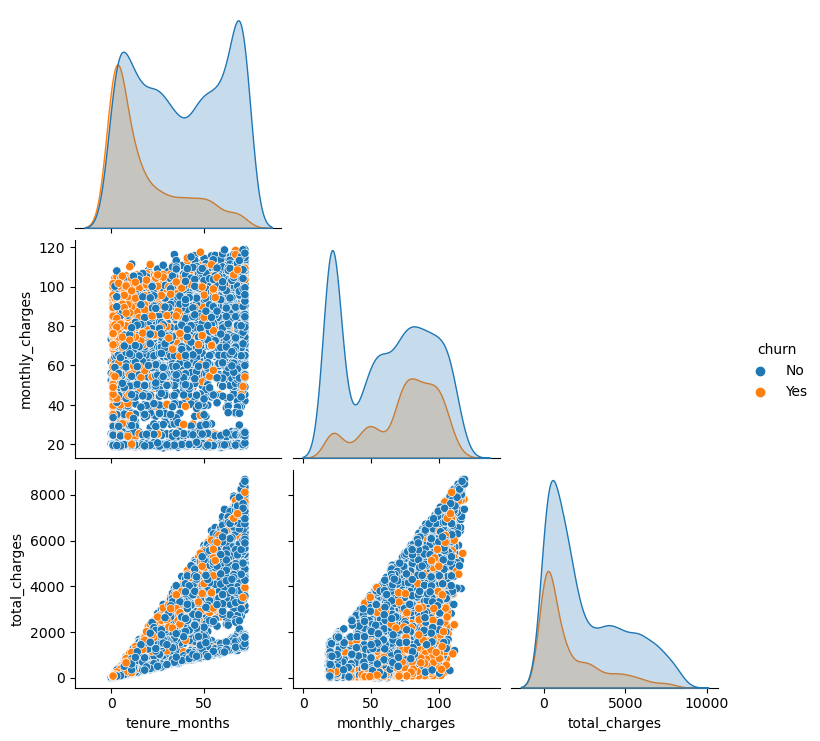

In [170]:
sns.pairplot(train,corner=True,hue='churn')

plt.show()

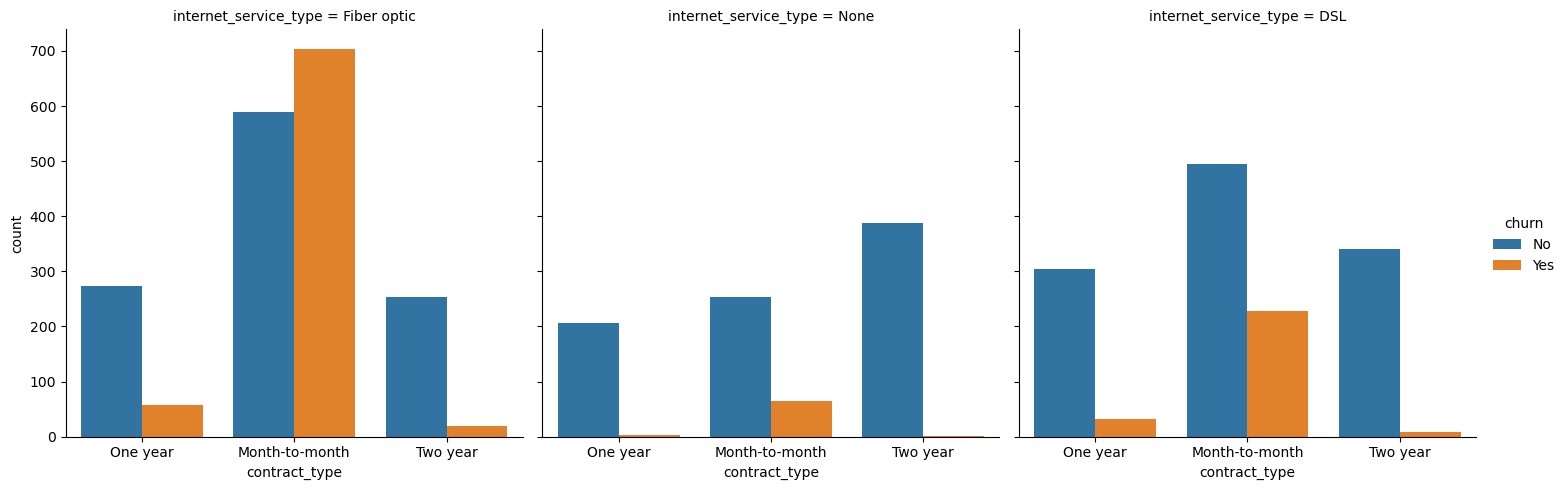

In [218]:
# plot internet types against contract types
# plt.grid(alpha=0.4)
sns.catplot(data=train,x='contract_type',col='internet_service_type',hue='churn',kind='count')

# plt.grid(alpha=0.4)

plt.show()

We can see from this graph that fiber optic makes up the greatest proportion of month-to-month contracts and the biggest proportion of churn

So our primary questions:

> - Does internet (or lack of) affect churn? If so, do any of the internet services have an impact on churn?
    - Yes, it does. Having internet seems to increase the likelihood of churn, and fiber optic most of all.
> - What is the relationship between monthly charges and churn?
    - A higher monthly charge does tend to increase churn rates. Something to explore regarding this would be whether tenure or number of services influence this.
> - What contract types cause higher churn?
    - Month-to-month churn the most, which makes sense considering it's the most flexible rate, and these customers may be looking for better deals. After that is the 2-year contract, and the 1-year contract churns the least.

Other things we may want to explore:
- What if having children causes higher churn?
- Is there a preferred contract type for senior citizens, single people, married people, and married with children?
    - Are there preferred services among these groups?
- How do phone lines match up against single and married individuals?
- How is the contrast between tenure and monthly charges?
- How does internet service type match up against monthly charges?

In [489]:
def telco_plots(df):
    '''
    Simple function to plot three things to look at
    '''
    sns.countplot(data=df,x='contract_type',hue='churn')
    plt.title('How does contract type relate to churn?')
    plt.grid(alpha=0.4)
    plt.show()
    
    sns.histplot(data=df,x='monthly_charges',hue='churn',kde=True,multiple='stack',alpha=0.5,line_kws={'lw':2,'ls':'-.'})
    plt.title('Distribution of Monthly Charges in Relation to Churn')
    plt.grid(alpha=0.4)
    plt.show()
    
    sns.countplot(data=train,x='internet_service_type',hue='churn')
    plt.title('Number of Active Customers to Churned Customers According to Internet Type')
    plt.grid(alpha=0.4)
    plt.show()
    
    sns.catplot(data=train,x='contract_type',col='internet_service_type',hue='churn',kind='count')
    plt.suptitle('Comparison of Contract Type and Churn Split by Internet Service')
    plt.subplots_adjust(top=0.9)
    plt.show()

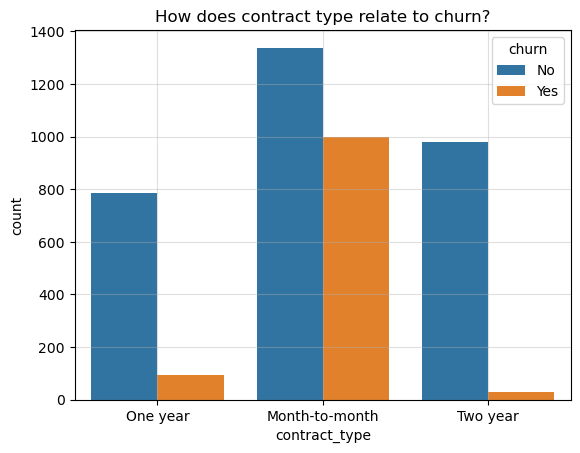

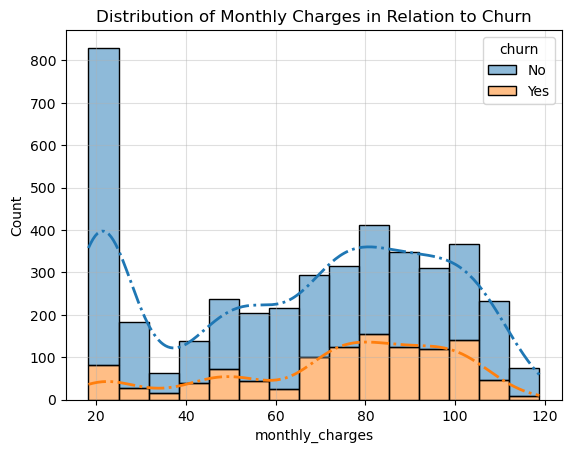

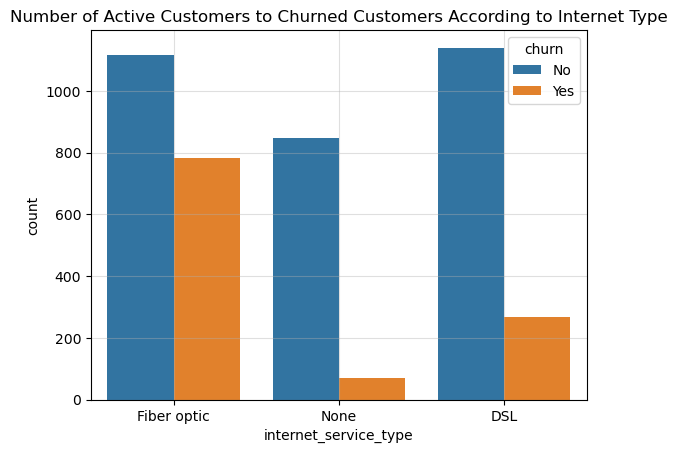

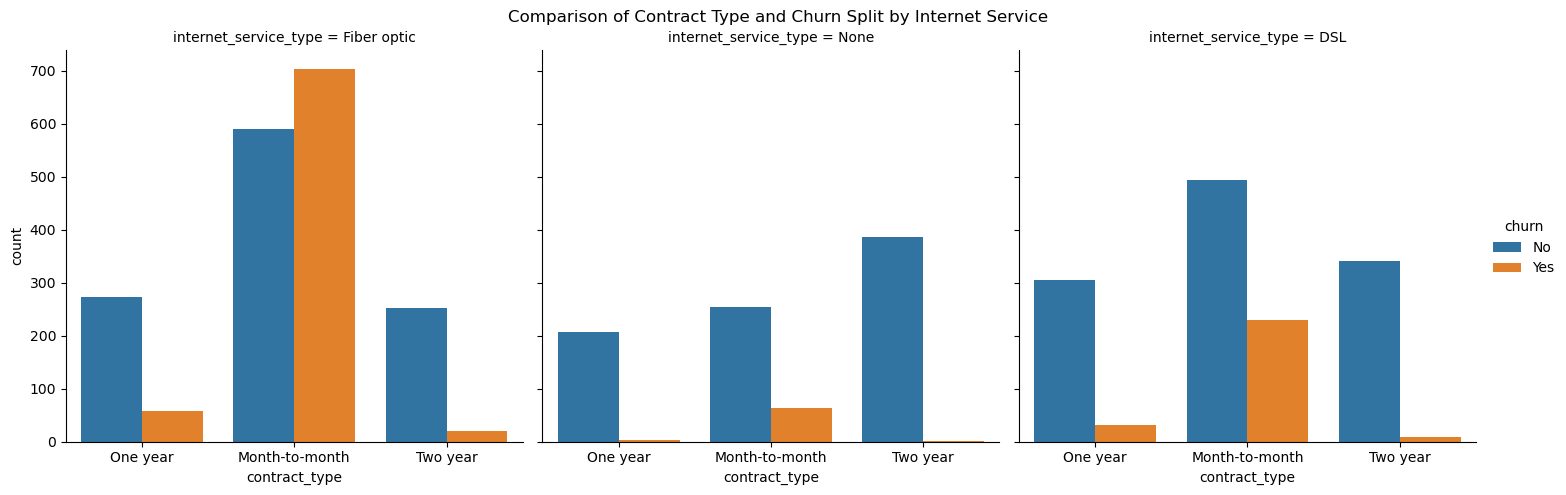

In [491]:
telco_plots(train)

In [421]:
acquire.print_libs()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [493]:
write_contents = [
    """
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
    """,
    """
def telco_plots(df):
    '''
    Simple function to plot some things to look at
    '''
    sns.countplot(data=df,x='contract_type',hue='churn')
    plt.title('How does contract type relate to churn?')
    plt.grid(alpha=0.4)
    plt.show()
    
    sns.histplot(data=df,x='monthly_charges',hue='churn',kde=True,multiple='stack',alpha=0.5,line_kws={'lw':2,'ls':'-.'})
    plt.title('Distribution of Monthly Charges in Relation to Churn')
    plt.grid(alpha=0.4)
    plt.show()
    
    sns.countplot(data=train,x='internet_service_type',hue='churn')
    plt.title('Number of Active Customers to Churned Customers According to Internet Type')
    plt.grid(alpha=0.4)
    plt.show()
    
    sns.catplot(data=train,x='contract_type',col='internet_service_type',hue='churn',kind='count')
    plt.suptitle('Comparison of Contract Type and Churn Split by Internet Service')
    plt.subplots_adjust(top=0.9)
    plt.show()
    """
]

In [502]:
with open('explore.py','a') as file:
    for content in write_contents:
        file.write(content + '\n')

### Build the encoders
- [x] Drop columns for the models (build function if necessary)
- [x] Encode the data
- [x] Make explore.py

In [510]:
write_contents = []

In [514]:
acquire.print_libs()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [517]:
def drop_cols(df,cols=[],extras=False,degree=6):
    '''
    Drops columns. If no columns provided, then returns dataframe as is.
    
    Arguments:
    df: Required. DataFrame with columns to be dropped.
    cols: List, default is empty. If provided a list, then will drop the columns.
    extras: Default is False. If True, will run drop_extras function with provided degree.
        drop_extras will use a statistical test to determine a number of categorical columns to be dropped.
        Runs after other columns are dropped, which may impact the stats test run.
    degree: Default = 6. Used only in case extras is True.
    '''
    df = df.drop(columns=cols,errors='ignore')
    
    if extras == True:
        df = prepare.drop_extras(df,degree)
        
    return df

# prepare.drop_extras()

In [520]:
# add drop_cols to prepare.py
with open('prepare.py','a') as file:
    file.write("""
def drop_cols(df,cols=[],extras=False,degree=6):
    '''
    Drops columns. If no columns provided, then returns dataframe as is.
    
    Arguments:
    df: Required. DataFrame with columns to be dropped.
    cols: List, default is empty. If provided a list, then will drop the columns.
    extras: Default is False. If True, will run drop_extras function with provided degree.
        drop_extras will use a statistical test to determine a number of categorical columns to be dropped.
        Runs after other columns are dropped, which may impact the stats test run.
    degree: Default = 6. Used only in case extras is True.
    '''
    df = df.drop(columns=cols,errors='ignore')
    
    if extras == True:
        df = drop_extras(df,degree)
        
    return df
    """)

In [253]:
# Testing out the newly made function
drop_cols(train,extras=True,degree=8)

,tenure_months,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,streaming,protection,support
customer_id,,,,,,,,,,,
4083-BFNYK,38,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic),Movies,Online Security,Online Backup
5804-LEPIM,2,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check,Neither,Neither,Neither
4895-TMWIR,11,No,19.95,214.75,Yes,Month-to-month,None,Mailed check,No internet service,No internet service,No internet service
1342-JPNKI,10,Yes,86.05,834.10,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),TV,Neither,Neither
3397-AVTKU,43,Yes,60.00,2548.55,No,Two year,DSL,Electronic check,Movies,Neither,Online Backup
...,...,...,...,...,...,...,...,...,...,...,...
1915-IOFGU,1,No,70.50,70.50,Yes,Month-to-month,Fiber optic,Electronic check,Neither,Neither,Neither
7025-WCBNE,47,No,59.60,2754.00,No,Two year,DSL,Bank transfer (automatic),Neither,Neither,Both
9788-HNGUT,72,Yes,116.95,8594.40,No,Two year,Fiber optic,Credit card (automatic),Both,Both,Both


In [257]:
acquire.df_info(train,samples=3)

,nunique,dtypes,isnull,6702-OHFWR,0322-YINQP,8988-ECPJR
gender,2,object,0,Male,Male,Female
senior_citizen,2,object,0,Yes,No,Yes
married,2,object,0,No,No,Yes
children,2,object,0,No,No,Yes
tenure_months,73,int64,0,1,1,34
paperless_billing,2,object,0,Yes,Yes,Yes
monthly_charges,1374,float64,0,43.3,48.55,79.6
total_charges,4006,float64,0,43.3,48.55,2718.3
churn,2,object,0,Yes,Yes,Yes
contract_type,3,object,0,Month-to-month,Month-to-month,Month-to-month


Planning out the encoding function:
1. Base version: turns everything into floats (using pd.get_dummies and astype(float))
2. V2: Drops columns manually given
3. V3: Drops columns manually given and with low relation to churn
4. V4: Drops columns manually given and with low relation to churn and also drops columns with nunique >= 4

In [533]:
pd.get_dummies(train[obj_col[0]],drop_first=True)

,Male
customer_id,
4083-BFNYK,False
5804-LEPIM,False
4895-TMWIR,True
1342-JPNKI,True
3397-AVTKU,True
...,...
1915-IOFGU,False
7025-WCBNE,True
9788-HNGUT,True


In [280]:
# First get dummy column name
# Then append it to 'is_'
# Then assign that as the column name
# Then add column name to drop list
# Feed drop list to the drop_cols function
# Return dataframe

In [304]:
dummies = pd.get_dummies(train[obj_col[1]],drop_first=True)
dummies

,Yes
customer_id,
4083-BFNYK,True
5804-LEPIM,True
4895-TMWIR,True
1342-JPNKI,False
3397-AVTKU,False
...,...
1915-IOFGU,False
7025-WCBNE,True
9788-HNGUT,False


In [308]:
dummies.columns = [obj_col[1]+'_is_'+col for col in dummies.columns]
dummies

,senior_citizen_is_senior_citizen_is_Yes
customer_id,
4083-BFNYK,True
5804-LEPIM,True
4895-TMWIR,True
1342-JPNKI,False
3397-AVTKU,False
...,...
1915-IOFGU,False
7025-WCBNE,True
9788-HNGUT,False


In [310]:
encoded = train
encoded

,gender,senior_citizen,married,children,tenure_months,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,streaming,phone_lines,protection,support
customer_id,,,,,,,,,,,,,,,,
4083-BFNYK,Female,Yes,Yes,No,38,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic),Movies,Multiple,Online Security,Online Backup
5804-LEPIM,Female,Yes,No,No,2,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check,Neither,Single,Neither,Neither
4895-TMWIR,Male,Yes,Yes,No,11,No,19.95,214.75,Yes,Month-to-month,None,Mailed check,No internet service,Single,No internet service,No internet service
1342-JPNKI,Male,No,No,No,10,Yes,86.05,834.10,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),TV,Multiple,Neither,Neither
3397-AVTKU,Male,No,No,No,43,Yes,60.00,2548.55,No,Two year,DSL,Electronic check,Movies,Single,Neither,Online Backup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915-IOFGU,Female,No,No,No,1,No,70.50,70.50,Yes,Month-to-month,Fiber optic,Electronic check,Neither,Single,Neither,Neither
7025-WCBNE,Male,Yes,No,No,47,No,59.60,2754.00,No,Two year,DSL,Bank transfer (automatic),Neither,Multiple,Neither,Both
9788-HNGUT,Male,No,Yes,No,72,Yes,116.95,8594.40,No,Two year,Fiber optic,Credit card (automatic),Both,Multiple,Both,Both


In [312]:
for col in obj_col:
    dummies = pd.get_dummies(train[col],drop_first=True)
    dummies.columns = [col+'_is_'+column for column in dummies.columns]
    
    for column in dummies.columns:
        encoded[column] = dummies[column]
    
    encoded = encoded.drop(columns=col)

In [318]:
acquire.df_info(encoded.astype(float))

,nunique,dtypes,isnull,7328-ZJAJO
tenure_months,73,float64,0,59.00
monthly_charges,1374,float64,0,19.50
total_charges,4006,float64,0,1222.65
gender_is_Male,2,float64,0,0.00
senior_citizen_is_Yes,2,float64,0,0.00
married_is_Yes,2,float64,0,1.00
children_is_Yes,2,float64,0,1.00
paperless_billing_is_Yes,2,float64,0,0.00
churn_is_Yes,2,float64,0,0.00
contract_type_is_One year,2,float64,0,0.00


In [339]:
# Clean slate the obj_col variable
obj_col = []
obj_col

[]

In [341]:
obj_col = [col for col in train.columns if train[col].dtype == 'O']
obj_col

['gender',
 'senior_citizen',
 'married',
 'children',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'streaming',
 'phone_lines',
 'protection',
 'support']

In [535]:
def encode_df(df):
    '''
    Takes a processed dataframe and encodes the object columns for usage in modeling.
    
    !!! MAKE ME MORE DYNAMIC !!!
    - Add functionality to check if passed a list or dataframe
    - If dataframe, then run standard loop
    - If list then check if each item is a dataframe (checking for train/validate/test)
    - If list and each item is dataframe, then try loop on each dataframe
    - Otherwise return an error
    '''
    # Get the object columns from the dataframe
    obj_col = [col for col in df.columns if df[col].dtype == 'O']
    
    # Begin encoding the object columns
    for col in obj_col:
        # Grab current column dummies
        dummies = pd.get_dummies(df[col],drop_first=True)
        
        # concatenate the names in a descriptive manner
        dummies.columns = [col+'_is_'+column for column in dummies.columns]

        # add these new columns to the dataframe
        for column in dummies.columns:
            df[column] = dummies[column]
        
        # Drop the old columns from the dataframe
        df = df.drop(columns=col)
    
    return df.astype(float)

In [539]:
# check working
encode_df(train)

,tenure_months,monthly_charges,total_charges,gender_is_Male,senior_citizen_is_Yes,married_is_Yes,children_is_Yes,paperless_billing_is_Yes,churn_is_Yes,contract_type_is_One year,...,phone_lines_is_No phone service,phone_lines_is_Single,protection_is_Device Protection,protection_is_Neither,protection_is_No internet service,protection_is_Online Security,support_is_Neither,support_is_No internet service,support_is_Online Backup,support_is_Tech Support
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,38.0,95.00,3591.25,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5804-LEPIM,2.0,70.35,139.05,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4895-TMWIR,11.0,19.95,214.75,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1342-JPNKI,10.0,86.05,834.10,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3397-AVTKU,43.0,60.00,2548.55,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915-IOFGU,1.0,70.50,70.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7025-WCBNE,47.0,59.60,2754.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9788-HNGUT,72.0,116.95,8594.40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [395]:
drop_cols(train,extras=True,cols=['gender_is_Male','total_charges'],degree=7)

,tenure_months,monthly_charges,churn,contract_type,internet_service_type,payment_type,streaming,protection,support
customer_id,,,,,,,,,
4083-BFNYK,38,95.00,No,One year,Fiber optic,Credit card (automatic),Movies,Online Security,Online Backup
5804-LEPIM,2,70.35,Yes,Month-to-month,Fiber optic,Electronic check,Neither,Neither,Neither
4895-TMWIR,11,19.95,Yes,Month-to-month,None,Mailed check,No internet service,No internet service,No internet service
1342-JPNKI,10,86.05,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),TV,Neither,Neither
3397-AVTKU,43,60.00,No,Two year,DSL,Electronic check,Movies,Neither,Online Backup
...,...,...,...,...,...,...,...,...,...
1915-IOFGU,1,70.50,Yes,Month-to-month,Fiber optic,Electronic check,Neither,Neither,Neither
7025-WCBNE,47,59.60,No,Two year,DSL,Bank transfer (automatic),Neither,Neither,Both
9788-HNGUT,72,116.95,No,Two year,Fiber optic,Credit card (automatic),Both,Both,Both


In [409]:
encoded = drop_cols(train,extras=True,cols=['gender_is_Male','total_charges'],degree=8)

In [411]:
encoded = encode_df(encoded).astype(float)
encoded

,tenure_months,monthly_charges,paperless_billing_is_Yes,churn_is_Yes,contract_type_is_One year,contract_type_is_Two year,internet_service_type_is_Fiber optic,internet_service_type_is_None,payment_type_is_Credit card (automatic),payment_type_is_Electronic check,...,streaming_is_No internet service,streaming_is_TV,protection_is_Device Protection,protection_is_Neither,protection_is_No internet service,protection_is_Online Security,support_is_Neither,support_is_No internet service,support_is_Online Backup,support_is_Tech Support
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,38.0,95.00,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5804-LEPIM,2.0,70.35,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4895-TMWIR,11.0,19.95,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1342-JPNKI,10.0,86.05,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3397-AVTKU,43.0,60.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915-IOFGU,1.0,70.50,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7025-WCBNE,47.0,59.60,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9788-HNGUT,72.0,116.95,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [413]:
acquire.print_libs()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [525]:
write_contents = [
    """
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
    """,
    """
def encode_df(df):
    '''
    Takes a processed dataframe and encodes the object columns for usage in modeling.
    
    !!! MAKE ME MORE DYNAMIC !!!
    - Add functionality to check if passed a list or dataframe
    - If dataframe, then run standard loop
    - If list then check if each item is a dataframe (checking for train/validate/test)
    - If list and each item is dataframe, then try loop on each dataframe
    - Otherwise return an error
    '''
    # Get the object columns from the dataframe
    obj_col = [col for col in df.columns if df[col].dtype == 'O']
    
    # Begin encoding the object columns
    for col in obj_col:
        # Grab current column dummies
        dummies = pd.get_dummies(df[col],drop_first=True)
        
        # concatenate the names in a descriptive manner
        dummies.columns = [col+'_is_'+column for column in dummies.columns]

        # add these new columns to the dataframe
        for column in dummies.columns:
            df[column] = dummies[column]
        
        # Drop the old columns from the dataframe
        df = df.drop(columns=col)
    
    return df
    """
]

In [527]:
with open('model.py','a') as file:
    for content in write_contents:
        file.write(content + '\n')